In [1]:
#Download data from kaggle
import kagglehub
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Download latest version
path = kagglehub.dataset_download("gopalmahadevan/fraud-detection-example")

print("Path to dataset files:", path)

Path to dataset files: /Users/kyiwin/.cache/kagglehub/datasets/gopalmahadevan/fraud-detection-example/versions/1


In [3]:
!pip install kagglehub

In [4]:
#load the dataset
data = pd.read_csv("~/Downloads/fraud_dataset_example.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [5]:
#view the transaction
data.iloc[0]

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg        170136.0
newbalanceOrig      160296.36
nameDest          M1979787155
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object

In [6]:
# view the transaction
data.iloc[1]

step                        1
type                  PAYMENT
amount                1864.28
nameOrig          C1666544295
oldbalanceOrg         21249.0
newbalanceOrig       19384.72
nameDest          M2044282225
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 1, dtype: object

In [7]:
#set up the dataframe
df = pd.DataFrame(data=data)

In [8]:
# view the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [9]:
# check the datatypes
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
# grouping a DataFrame by its index and calculating the mean of all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
combined_df = df[numeric_cols].groupby(level=0).mean()

In [11]:
#group the dataset by step
df.groupby("step", group_keys=True)[['amount']].apply(lambda x: x)

amount
step                   
1    0          9839.64
     1          1864.28
     2           181.00
     3           181.00
     4         11668.14
...                 ...
10   101608     7477.02
     101609   282252.35
     101610    17289.01
     101611  1347146.45
     101612   469539.21

[101613 rows x 1 columns]

In [12]:
# dataset with only numeric columns
combined_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0
1,1.0,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0
2,1.0,181.00,181.00,0.00,0.00,0.00,1.0,0.0
3,1.0,181.00,181.00,0.00,21182.00,0.00,1.0,0.0
4,1.0,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
101608,10.0,7477.02,785.00,0.00,0.00,0.00,0.0,0.0
101609,10.0,282252.35,220339.29,0.00,95156.01,91286.97,0.0,0.0
101610,10.0,17289.01,0.00,0.00,0.00,0.00,0.0,0.0
101611,10.0,1347146.45,1605.00,0.00,541639.43,2186953.43,0.0,0.0


In [13]:
# check if there is missing values
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
101608,False,False,False,False,False,False,False,False,False,False,False
101609,False,False,False,False,False,False,False,False,False,False,False
101610,False,False,False,False,False,False,False,False,False,False,False
101611,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# missing values total in all columns
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [16]:
#create a new data frame without 3 columns
df_new = df.drop(['type','nameOrig','nameDest'], axis=1)

In [17]:
df_new.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [18]:
# find correlation matrix
correlation_matrix = df_new.corr()

# Print the correlation matrix
print(correlation_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.076010       0.004918        0.004737   
amount          0.076010  1.000000      -0.010663       -0.016614   
oldbalanceOrg   0.004918 -0.010663       1.000000        0.998963   
newbalanceOrig  0.004737 -0.016614       0.998963        1.000000   
oldbalanceDest  0.009535  0.244933       0.103087        0.104622   
newbalanceDest  0.011181  0.372792       0.072234        0.071242   
isFraud        -0.051498  0.036008      -0.004235       -0.010546   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.009535        0.011181 -0.051498             NaN  
amount                0.244933        0.372792  0.036008             NaN  
oldbalanceOrg         0.103087        0.072234 -0.004235             NaN  
newbalanceOrig        0.104622        0.071242 -0.010546             NaN  
old

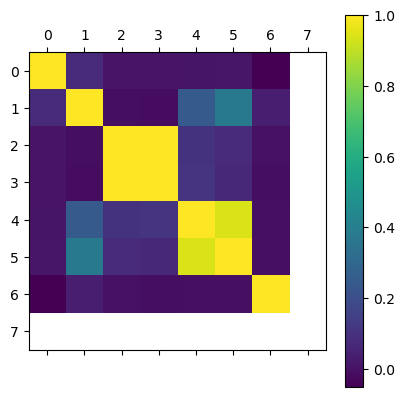

In [19]:
#plot the correlation matrix

plt.matshow(df_new.corr())
cb = plt.colorbar()
plt.show()


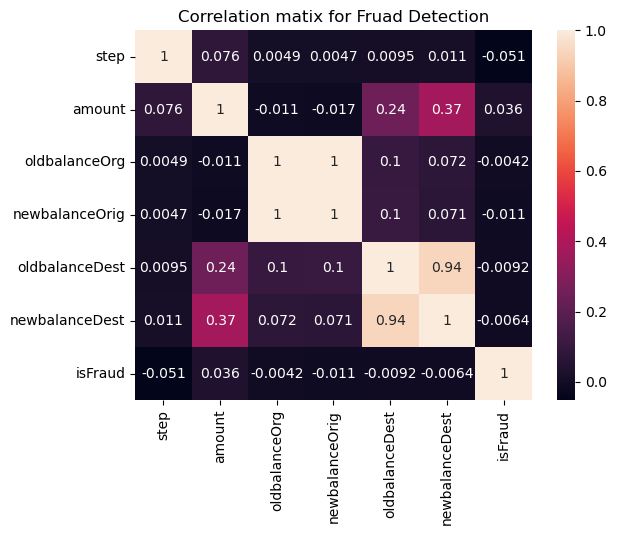

In [20]:
#plot correlation matrix using heatmap

# taking all rows but only 7 columns
df_small = df_new.iloc[:,:7]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title('Correlation matix for Fruad Detection')
plt.show()

In [21]:
#split dataset in features and target variable
col_names = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']
# load dataset

feature_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']
X = df_new[feature_cols] # Features
y = df_new.isFraud # Target variable

In [22]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [23]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter = 1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [24]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25372,     0],
       [   28,     4]])

In [26]:
X 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
101608,10,7477.02,785.00,0.00,0.00,0.00
101609,10,282252.35,220339.29,0.00,95156.01,91286.97
101610,10,17289.01,0.00,0.00,0.00,0.00
101611,10,1347146.45,1605.00,0.00,541639.43,2186953.43


In [27]:
y

0         0
1         0
2         1
3         1
4         0
         ..
101608    0
101609    0
101610    0
101611    0
101612    0
Name: isFraud, Length: 101613, dtype: int64

In [28]:
#apply statistical model

X_sm = sm.add_constant(X) 
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit_regularized(method='l1',alpha=0.01)
print(result.summary2())

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.006362485097633644
            Iterations: 84
            Function evaluations: 148
            Gradient evaluations: 84


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 7 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: isFraud          Pseudo R-squared: 0.283      
Date:               2025-11-28 14:01 AIC:              1306.9018  
No. Observations:   101613           BIC:              1373.6043  
Df Model:           6                Log-Likelihood:   -646.45    
Df Residuals:       101606           LL-Null:          -901.87    
Converged:          1.0000           LLR p-value:      3.8776e-107
No. Iterations:     84.0000          Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -3.4643   0.1982 -17.4817 0.0000 -3.8527 -3.0759
step              -0.3388   0.0298 -11.3701 0.0000 -0.3972 -0.2804
amount            -0.0000   0.0000  -4.0946 0.0000 -0.0000 -0.0000
oldbalanceOrg      0.

In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25372,     0],
       [   28,     4]])

Text(0.5, 427.9555555555555, 'Predicted label')

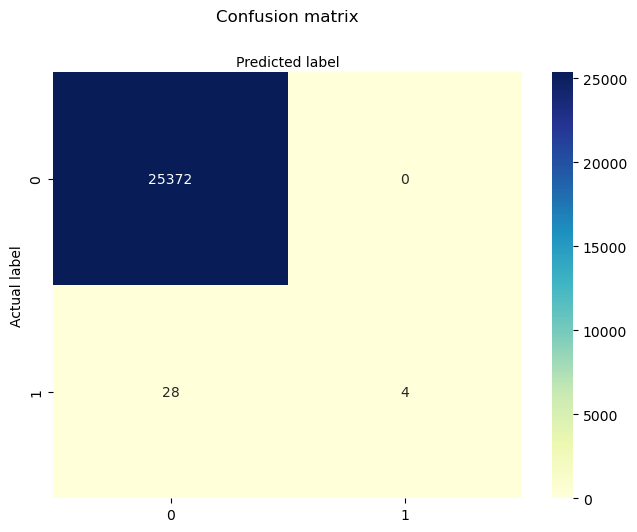

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [31]:
# find total numbers of fraud transactions
fraud_counts = df_new['isFraud'].value_counts()

In [32]:
print(fraud_counts)

isFraud
0    101497
1       116
Name: count, dtype: int64


/var/folders/jz/xsm4qv0x27ndntzf3bdy6nq80000gn/T/ipykernel_12219/1697565063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['step'].value_counts().sort_index().index,


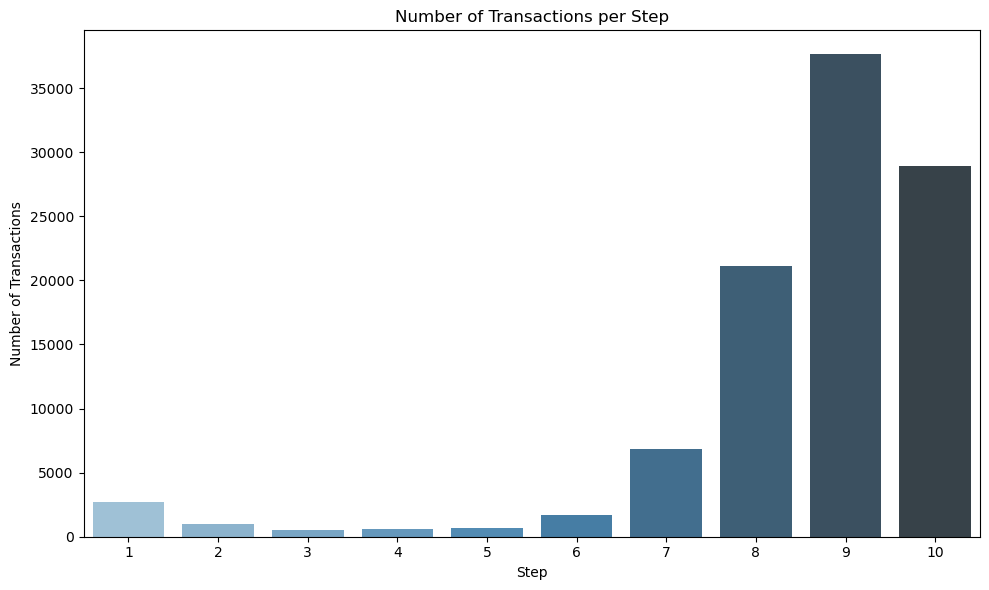

In [33]:
# graphed number of transactions per step
plt.figure(figsize=(10, 6))
sns.barplot(x=df['step'].value_counts().sort_index().index, 
            y=df['step'].value_counts().sort_index().values, 
            palette='Blues_d')
plt.title('Number of Transactions per Step')
plt.xlabel('Step')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

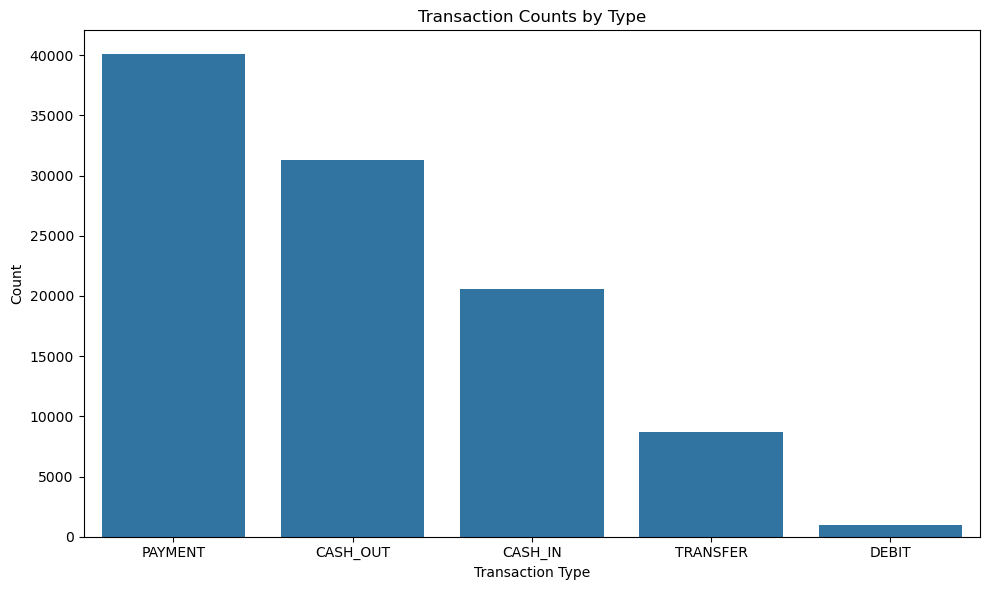

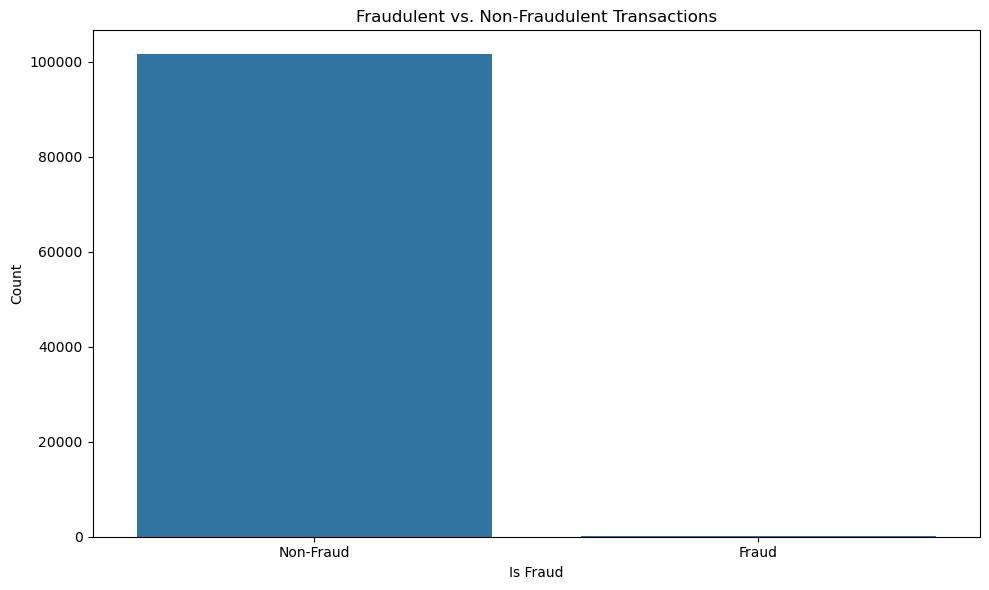

In [34]:
#transaction counts by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Counts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Fraudulent vs non fraudulent transactions
plt.figure(figsize=(10, 6))
fraud_counts = df['isFraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

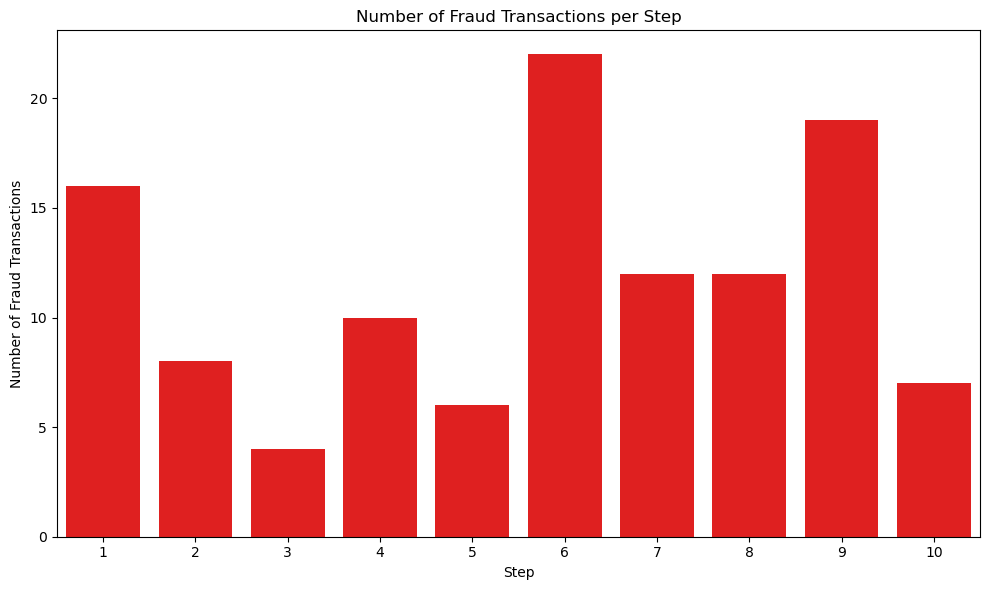

In [35]:
# Number of Fraud Transactions per step
assert df['step'].isnull().sum() == 0
assert df['isFraud'].isnull().sum() == 0

# Group by 'step' and sum 'isFraud'
fraud_per_step = df.groupby('step')['isFraud'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_per_step.index, y=fraud_per_step.values, color='red')
plt.title('Number of Fraud Transactions per Step')
plt.xlabel('Step')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()

In [36]:
 #Filter for fraud transactions
fraud_df = df[df['isFraud'] == 1]

# Group by 'step' and aggregate total and average amount
fraud_amount_stats = fraud_df.groupby('step')['amount'].agg(['sum', 'mean']).reset_index()
fraud_amount_stats.columns = ['step', 'total_fraud_amount', 'average_fraud_amount']

# Display the results
print(fraud_amount_stats)

   step  total_fraud_amount  average_fraud_amount
0     1          3740247.01          2.337654e+05
1     2          4186592.48          5.233241e+05
2     3            66832.74          1.670819e+04
3     4         26400274.90          2.640027e+06
4     5           381841.54          6.364026e+04
5     6           974869.68          4.431226e+04
6     7         12414694.06          1.034558e+06
7     8          1589040.41          1.324200e+05
8     9         11476630.22          6.040332e+05
9    10          1592074.16          2.274392e+05


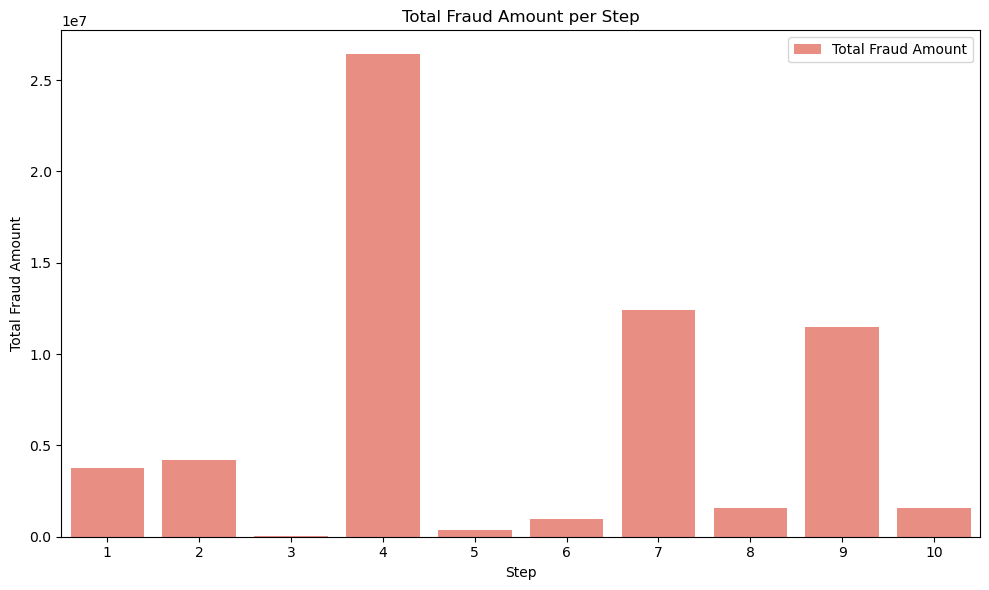

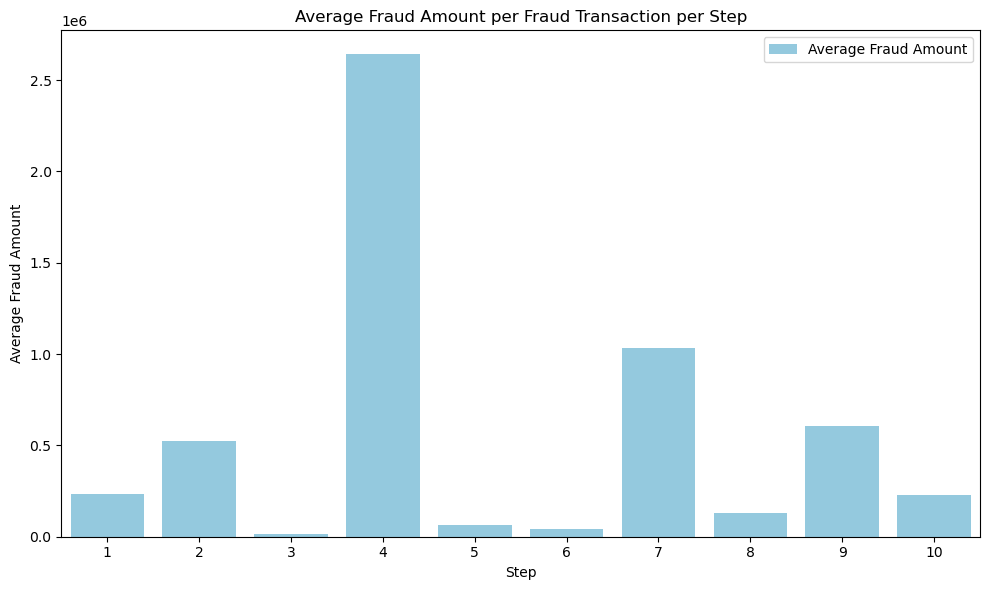

In [37]:
# Total Fraud Amount per step
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amount_stats, x='step', y='total_fraud_amount', color='salmon', label='Total Fraud Amount')
plt.ylabel('Total Fraud Amount')
plt.xlabel('Step')
plt.title('Total Fraud Amount per Step')
plt.tight_layout()
plt.show()

# Average Fraud amount per fraud transaction per step
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amount_stats, x='step', y='average_fraud_amount', color='skyblue', label='Average Fraud Amount')
plt.ylabel('Average Fraud Amount')
plt.xlabel('Step')
plt.title('Average Fraud Amount per Fraud Transaction per Step')
plt.tight_layout()
plt.show()

In [38]:
total_fraud_amount = df.loc[df['isFraud'] == 1, 'amount'].sum()
print(total_fraud_amount)

62823097.2


In [39]:
total_amount = df['amount'].sum()
print(total_amount)

17689814171.53


In [40]:
# drop two columsn in the dataframe
df_new1 = df.drop(['nameDest','nameOrig','isFlaggedFraud'], axis=1)

In [41]:
df_new1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,785.00,0.00,0.00,0.00,0
101609,10,CASH_OUT,282252.35,220339.29,0.00,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,0.00,0.00,0.00,0.00,0
101611,10,TRANSFER,1347146.45,1605.00,0.00,541639.43,2186953.43,0


In [42]:
flaggedfraud_counts = df['isFlaggedFraud'].value_counts()

In [43]:
flaggedfraud_counts

isFlaggedFraud
0    101613
Name: count, dtype: int64

In [44]:
# apply one hot encoding to the dataset
df_encoded = pd.get_dummies(df_new1, columns=['type'], prefix='type', dtype=int)

print(df_encoded)

        step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     9839.64      170136.00       160296.36            0.00   
1          1     1864.28       21249.00        19384.72            0.00   
2          1      181.00         181.00            0.00            0.00   
3          1      181.00         181.00            0.00        21182.00   
4          1    11668.14       41554.00        29885.86            0.00   
...      ...         ...            ...             ...             ...   
101608    10     7477.02         785.00            0.00            0.00   
101609    10   282252.35      220339.29            0.00        95156.01   
101610    10    17289.01           0.00            0.00            0.00   
101611    10  1347146.45        1605.00            0.00       541639.43   
101612    10   469539.21       31133.00            0.00            0.00   

        newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0                 0.00 

In [45]:
# number of columns in the dataset
df_encoded.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [46]:
# split dataset to feature and target using one hot encoded dataset
col_names_encoded = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
# load dataset

feature_cols_encoded = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
Xed = df_encoded[feature_cols_encoded] # Features
yed = df_encoded.isFraud # Target variable

In [47]:
# split the data to training and testing 
from sklearn.model_selection import train_test_split

Xed_train, Xed_test, yed_train, yed_test = train_test_split(Xed, yed, test_size=0.25, random_state=16)

In [48]:
# apply logistic regression to the dataset

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter = 1000)

# fit the model with data
logreg.fit(Xed_train, yed_train)

y_pred_ed = logreg.predict(Xed_test)

In [49]:
def print_scores(yed, y_pred_ed):
    # Add your scoring logic here
    # For example:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(yed, y_pred_ed)
    precision = precision_score(yed, y_pred_ed, average='weighted')
    recall = recall_score(yed, y_pred_ed, average='weighted')
    f1 = f1_score(yed, y_pred_ed, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Now call the function
print_scores(yed_test, y_pred_ed)  # Note: fixed variable name from 'yed_test' to 'y_test'

Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1 Score: 0.9985


In [50]:
#find confusion matrix for the dataset
cnf_matrix = metrics.confusion_matrix(yed_test, y_pred_ed)
cnf_matrix

array([[25372,     0],
       [   28,     4]])

In [51]:
# Finding the statistic from logistic regression model
import numpy as np
X_smed = sm.add_constant(Xed) 
logit_model = sm.Logit(yed, X_smed)
result = logit_model.fit_regularized(method='l1',alpha=0.01)
print(result.summary2())

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.004427455536387076
            Iterations: 144
            Function evaluations: 208
            Gradient evaluations: 144


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                                 Results: Logit
Model:                   Logit                 Method:                MLE        
Dependent Variable:      isFraud               Pseudo R-squared:      0.502      
Date:                    2025-11-28 14:01      AIC:                   922.8876   
No. Observations:        101613                BIC:                   1037.2347  
Df Model:                11                    Log-Likelihood:        -449.44    
Df Residuals:            101601                LL-Null:               -901.87    
Converged:               1.0000                LLR p-value:           5.5979e-187
No. Iterations:          144.0000              Scale:                 1.0000     
---------------------------------------------------------------------------------
                Coef.     Std.Err.      z     P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------
const           -4.2137 6849269.7507  -0.0000 1.00

In [52]:
# calculate the accuracy score using one hot encoded dataset
acc = accuracy_score(yed_test, logreg.predict(Xed_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 99.89%


<Axes: >

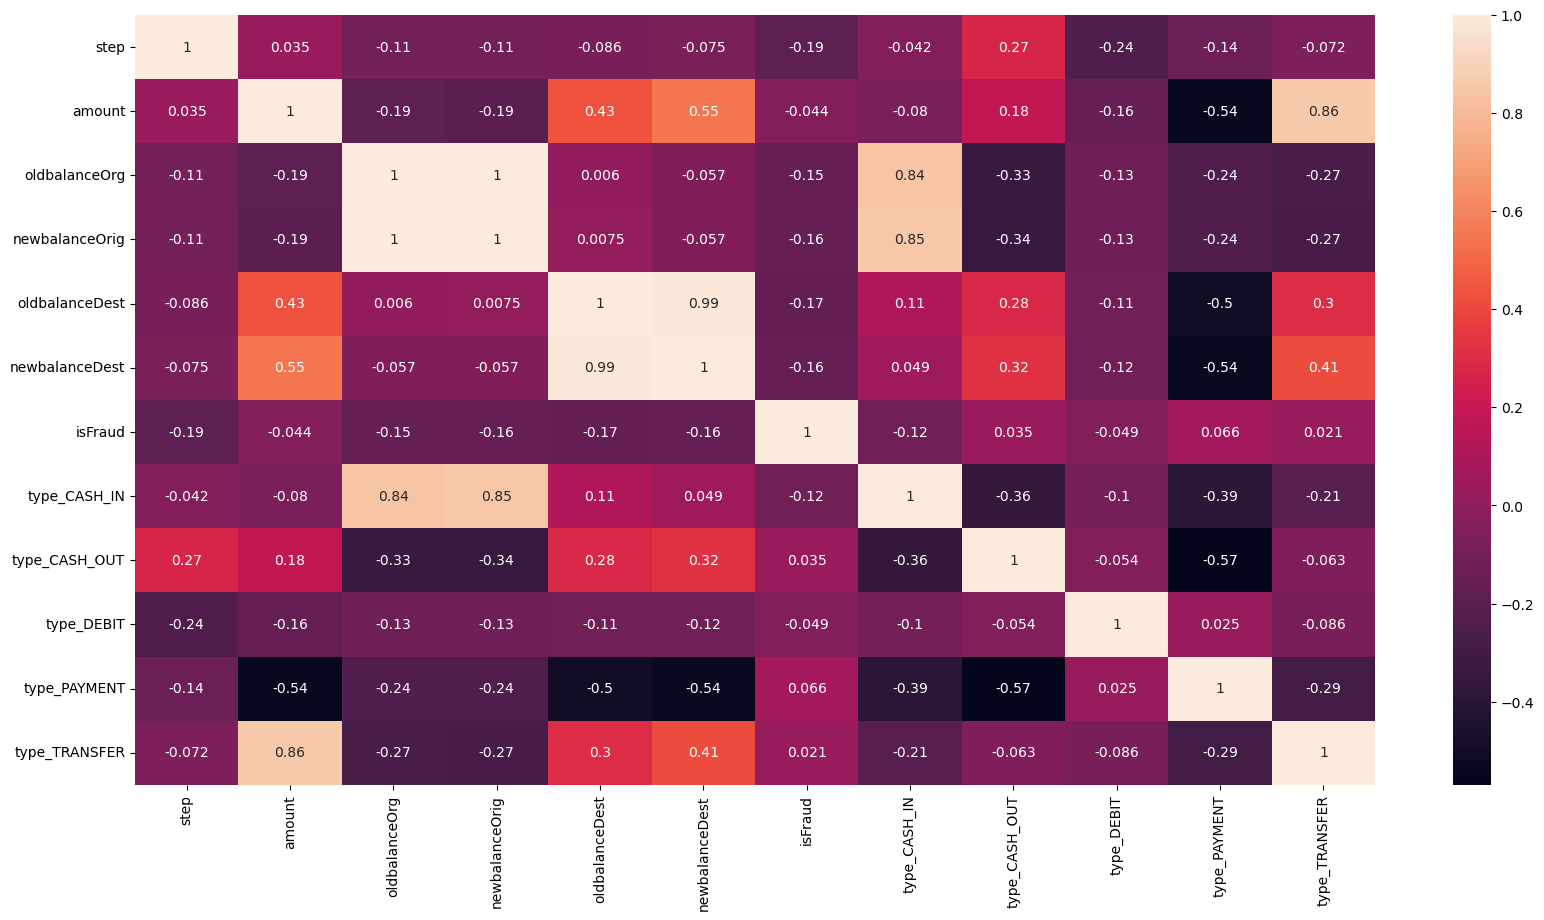

In [53]:
# Source - https://stackoverflow.com/a
# Posted by Siddhesh
# Retrieved 2025-11-28, License - CC BY-SA 4.0
df_encoded_small = df_encoded.iloc[:,:12]
correlation_encoded_mat = df_encoded_small.corr()   
plt.figure(figsize= (20, 10))
sns.heatmap(correlation_encoded_mat.corr(),annot= True)


In [54]:
# Define the target names correctly - these should be the class labels
target_names = ['Not Fraud', 'Fraud']  # Assuming 0 = Not Fraud, 1 = Fraud

# Generate the classification report with proper target names
report = classification_report(yed_test, y_pred_ed, target_names=target_names)
print(report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25372
       Fraud       1.00      0.12      0.22        32

    accuracy                           1.00     25404
   macro avg       1.00      0.56      0.61     25404
weighted avg       1.00      1.00      1.00     25404

